### データ理解

In [103]:
classes = {
    0 : 'L',
    1 : 'O',
    2 : 'V',
    3 : 'E',
}
classes

{0: 'L', 1: 'O', 2: 'V', 3: 'E'}

In [104]:
import tensorflow as tf

x_train = tf.constant(
    [
        [
            [1, 0, 0, 0, 0],
            [1, 0, 0, 0, 0],
            [1, 0, 0, 0, 0],
            [1, 0, 0, 0, 0],
            [1, 1, 1, 1, 1],
        ],
        [
            [1, 1, 1, 1, 1],
            [1, 0, 0, 0, 1],
            [1, 0, 0, 0, 1],
            [1, 0, 0, 0, 1],
            [1, 1, 1, 1, 1],
        ],
        [
            [1, 0, 0, 0, 1],
            [1, 0, 0, 0, 1],
            [1, 0, 0, 0, 1],
            [0, 1, 1, 1, 0],
            [0, 0, 1, 0, 0],
        ],
        [
            [1, 1, 1, 1, 1],
            [1, 0, 0, 0, 0],
            [1, 1, 1, 1, 1],
            [1, 0, 0, 0, 0],
            [1, 1, 1, 1, 1],
        ],
    ]
)

In [105]:
x_train.shape

TensorShape([4, 5, 5])

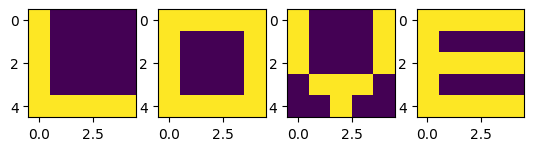

In [106]:
import matplotlib.pyplot as plt

words = x_train.shape[0]

for i in range(words):
    plt.subplot(1, words, i+1)
    plt.imshow(x_train[i])
plt.show()

In [107]:
y_train = tf.constant([0., 1., 2., 3.])

### モデル構築

In [108]:
class Model(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.flatten = tf.keras.layers.Flatten()
        self.fc1 = tf.keras.layers.Dense(32)
        self.fc2 = tf.keras.layers.Dense(32)
        self.fc3 = tf.keras.layers.Dense(4)

    def call(self, x):
        x = self.flatten(x)
        x = tf.nn.relu(self.fc1(x))
        x = tf.nn.relu(self.fc2(x))
        x = tf.nn.softmax(self.fc3(x))
        return x

In [109]:
model = Model()
model(x_train)

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[0.24943958, 0.2586276 , 0.2340136 , 0.25791922],
       [0.2567919 , 0.3291089 , 0.21995577, 0.1941435 ],
       [0.2048074 , 0.2619052 , 0.23944461, 0.29384273],
       [0.25819814, 0.2613035 , 0.26246843, 0.21802993]], dtype=float32)>

### ハイパーパラメータ設定

In [110]:
loss = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
epochs = 100

### 訓練

In [111]:
model.compile(loss=loss, optimizer=optimizer)
hist = model.fit(x_train, y_train, epochs=epochs)

Epoch 1/100
1/1 [==============================] - 1s 841ms/step - loss: 1.3631
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 1.3398
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 1.3182
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 1.2966
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 1.2753
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 1.2542
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 1.2337
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 1.2140
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 1.1944
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 1.1749
Epoch 11/100
1/1 [==============================] - 0s 9ms/step - loss: 1.1561
Epoch 12/100
1/1 [==============================] - 0s 8ms/step - loss: 1.1375
Epoch 13/100
1/1 [==============================] - 0s 10

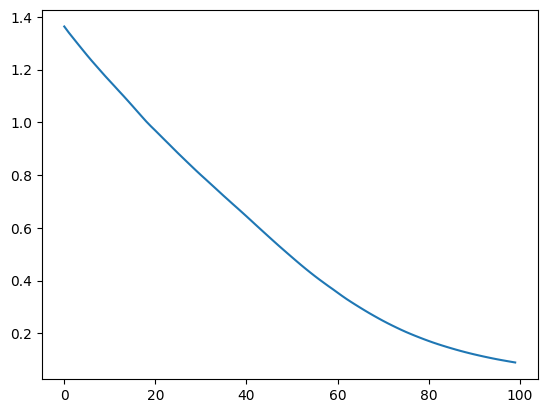

In [112]:
plt.plot(hist.history['loss'])
plt.show()

### 推論

In [113]:
x_pred = tf.constant(
    [
        [
            [1., 0., 0., 0., 0.],
            [1., 0., 0., 0., 0.],
            [1., 0., 0., 0., 0.],
            [1., 1., 0., 0., 1.],
            [1., 1., 1., 1., 1.],
        ],
        [
            [1., 1., 1., 1., 1.],
            [1., 1., 0., 0., 1.],
            [1., 0., 0., 0., 1.],
            [1., 0., 0., 1., 1.],
            [1., 1., 1., 1., 1.],
        ],
        [
            [1., 0., 0., 0., 1.],
            [1., 0., 0., 0., 1.],
            [1., 0., 0., 0., 1.],
            [0., 1., 1., 1., 0.],
            [0., 0., 1., 0., 0.],
        ],
        [
            [1., 1., 1., 1., 1.],
            [1., 0., 0., 0., 0.],
            [1., 1., 1., 1., 0.],
            [1., 0., 0., 0., 0.],
            [1., 1., 1., 1., 1.],
        ],
    ]
)

In [114]:
y_pred = model.predict(x_pred)
[classes[y] for y in tf.math.argmax(y_pred, axis=1).numpy()]

1/1 [==============================] - 0s 48ms/step


['L', 'O', 'V', 'E']